In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install bnltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 110.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0


In [3]:
!pip install pandas

In [4]:
!pip install scikit-learn

In [5]:
!pip install matplotlib

<font color = 'red'> Sometime numpy create problem so that we install a stable version `numpy==1.23.0`

In [6]:
# !pip install numpy==1.23.0

In [7]:
from matplotlib import pyplot as plt

In [8]:
from bnltk.tokenize import Tokenizers

In [9]:
# Uninstall current SciPy and scikit-learn
# !pip uninstall -y scipy scikit-learn

# Install compatible versions with numpy==1.23.0
# !pip install scipy==1.9.3 scikit-learn==1.2.2

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy import stats
import numpy as np
import sklearn.metrics as metrics
import collections
import nltk
import pandas as pd
import codecs

In [11]:
INPUT_FILE = '/content/drive/MyDrive/nlp-class-live/ecommerce_dataset.txt'
stopwords_list = '/content/drive/MyDrive/nlp-class-live/stopwords.txt'


# Data Preparation and Data Cleaning

In [12]:
import collections
import codecs
import string

In [13]:
# Initialize the tokenizer and counter
from bnltk.tokenize import Tokenizers
counter = collections.Counter()
tokenizer = Tokenizers()
maxlen = 0
xs, ys = [], []


# Load stopwords
bangla_stopwords = codecs.open(stopwords_list, 'r', encoding='utf-8').read().split()


# Open the input file
fin = codecs.open(INPUT_FILE, "r", encoding='utf-16')


# Define punctuation marks (adjust for Bangla punctuation if necessary)
punctuation_marks = set(string.punctuation)  # You can add any specific punctuation for Bengali as well if needed


# Process the file line by line
for line in fin:
    _, sent = line.strip().split("\t")  # Stripping the dataset based on tab. That is stripping label from sentence
    print("Label: ", _)
    print("Sentence: ", sent)


    # Tokenize the sentence
    words = tokenizer.bn_word_tokenizer(sent)
    print("After Tokenizing:", words)


    # Exclude punctuation marks
    wordsExcludingPunctuationMarks = [word for word in words if word not in punctuation_marks]
    print("After Excluding Punctuation Marks:", wordsExcludingPunctuationMarks)


    # Exclude stopwords
    wordsExcludingStopwords = [word for word in wordsExcludingPunctuationMarks if word not in bangla_stopwords]
    print("After Excluding Stopwords:", wordsExcludingStopwords)


    # Update maxlen for sentence length
    if len(wordsExcludingStopwords) > maxlen:
        maxlen = len(wordsExcludingStopwords)


    # Update word frequency counter
    for word in wordsExcludingStopwords:
        counter[word] += 1

    print("***************************************************************************************")


    # Append sentence and label for further processing
    ys.append(int(_))
    xs.append(' '.join(wordsExcludingStopwords))


# Close the input file
fin.close()



Streaming output truncated to the last 5000 lines.
After Excluding Stopwords: ['প্যাকেজিং', 'ভালো', '।', 'প্রোডাক্ট', 'ভালো', 'ওয়াটার', 'প্রুফ', '।', 'তাড়াতাড়িই', 'প্রোডাক্ট', 'হাতে', 'পেয়েছি', '।', 'সবমিলিয়ে', 'সন্তোষজনক']
***************************************************************************************
Label:  1
Sentence:  প্রোডাক্ট টা খুবই ভালো প্যাকেটিং টা অনেক সুন্দর ছিল ঘড়িটা অনেক সুন্দর এক কথায় বলতে গেলে অসাধারণ
After Tokenizing: ['প্রোডাক্ট', 'টা', 'খুবই', 'ভালো', 'প্যাকেটিং', 'টা', 'অনেক', 'সুন্দর', 'ছিল', 'ঘড়িটা', 'অনেক', 'সুন্দর', 'এক', 'কথায়', 'বলতে', 'গেলে', 'অসাধারণ']
After Excluding Punctuation Marks: ['প্রোডাক্ট', 'টা', 'খুবই', 'ভালো', 'প্যাকেটিং', 'টা', 'অনেক', 'সুন্দর', 'ছিল', 'ঘড়িটা', 'অনেক', 'সুন্দর', 'এক', 'কথায়', 'বলতে', 'গেলে', 'অসাধারণ']
After Excluding Stopwords: ['প্রোডাক্ট', 'টা', 'খুবই', 'ভালো', 'প্যাকেটিং', 'টা', 'সুন্দর', 'ঘড়িটা', 'সুন্দর', 'এক', 'কথায়', 'অসাধারণ']
******************************************************************************

## Reviews

In [14]:
xs

['অনেকগুলা অরডার একটু দেখবেন',
 'ভালোবাসা রইল ইভ্যালির',
 'আগের প্রডাক্ট ক্লিয়ার তারাতাড়ি',
 'ভাল লাগতেছে না',
 'দয়া একটু ভাই পাবো',
 'সঠিক তারিখে দিতেন অভিযোগ দিত না ।',
 'কমার্সের নামে আপনারা মানুষের সাথে করতেছে একদিন হিসাব আপনাদের কড়ায় ঘন্ডায়',
 'ফাইজলামি',
 'দীর্ঘ হায়াত কামনা',
 'ভাই অডার মত টাকা নাই স্বপ্নের খুবই প্রয়োজনীয় বাইকটা পাব না',
 'ভাই সামান্য গ্রোসারি আইটেম পারলেন না ৩ মাসে ।',
 'যুবকের স্বপ্ন বেঁচে পুরণ',
 'কথা মিল রাখলে গ্রাহক বারবে না কমবে আশা দ্রুত সমাদান ধন্যবাদ',
 'ভাই পন্য গুলো পাবো',
 'D a r a z মাসেই না কিনেছি । বড় ছোট অর্ডার ।',
 'প্রডাক্ট গুলো পাওয়ার সম্ভাবনা ভাই',
 'খবর বার্তা নাই তাড়াতাড়ি ডেলিভারি',
 'আপনারা কখনো মানুষের আস্থা অর্জন পারবেন না ১০০',
 'কাষ্টমারের ভোগান্তি কমিয়ে কথা অনুযায়ী করারও পরামর্শ রইলো',
 'ওয়াদা দিবেন না যেটা রক্ষা পারবেন না । ধন্যবাদ ।',
 'সততা ব্যবসা সফলতা আসবে ।',
 'ভালো ভালো রাখবেন গ্রাহক দের ।',
 'বেস্ট অব লাক',
 'এগিয়ে যাক ইভেলি আগামীর পথে স্বপ্ন পূরনে',
 'বাকি অর্ডার গুলো দেরি একটু দেওয়ার অনুরোধ করতেছি ।',
 'অর্ডার আসতে পারছে না

## Level

In [15]:
ys

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,


# <font color='Green'>Dataset Split

In [16]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25, random_state=0)


In [17]:
Xtrain


['খুবি বাজে কোয়ালিটি ভাই ডিজাইন ভালো লাগছিল কিনছিলাম দাম দিয়েও । বাট পুরাই বাজে',
 'আলহামদুলিল্লাহ যেটা ওর্ডার করছি পাইছি । অল্প দামে খুবই ভালো একটা প্রোডাক্ট',
 'মাসে ৫ ৬ ডেলিভারি ম্যান আসতো প্রডাক্ট ডেলিভারি এক এক বারও আসে না ডেলিভারি চার্জ বাড়ানোর অর্ডারই না',
 'ভালো লেগেছে',
 'এক আরেক ৷ চিটিং',
 'খারাপ অভিজ্ঞতা',
 'দুইটা নিয়েছি সুন্দর',
 'হাইলি রিকমেন্ডড',
 'রমজানের শার্ট দাম ৪৯৫ টাকা । ঈদের বেড়ে ৫৯৫ টাকা । সবচেয়ে বড় কথা এক সপ্তার কালার ।',
 'ধন্যবাদ ভাল মানের কাপড় ।',
 'স্নোবল ফেয়ারি লাইটস টা সত্যিই অসম্ভব সুন্দর । কোয়ালিটি ফুল । প্রতিটি লাইট ঠিক',
 'শুধু ধোঁকা বাজি',
 'পণ্যের দাম বেশি দেখিয়ে তারপরে ডিসকাউন্ট দেয়া । একটা শুভঙ্করের ফাঁকি',
 'বছর পাব না',
 'কোয়ালিটি এভারেজ সেলাইগুলো দুর্বল । ব্যাগটা সুন্দর বাচ্চাদের সাথে মানানসই । ভারী না বহন বুদ্ধিমানের ।',
 'ওয়েবসাইট বন্ধ',
 'জিনিস পাব',
 'খারাপ মানের খাবার',
 'জঘন্য বার্গার সত্যি টাকাই লস',
 'দোকানের পরিষেবা অত্যন্ত সন্তুষ্ট',
 'আলহামদুলিল্লাহ প্রোডাক্ট ভাল ছিলাম ঠিক তেমনই পেয়েছি',
 'হতাশ কেনার সীমা সীমাবদ্ধ অর্ডার পারছি ন

## Feature Enginnering

In [18]:
tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split())  #1200 I eat rice I,eat,rice [I,eat],[eat,rice],[I,rice]


In [19]:
Xtrain_tf = tfidf.fit_transform(Xtrain)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
print("n_samples: %d, n_features: %d" % Xtrain_tf.shape)

n_samples: 1223, n_features: 13854


In [21]:
Xtest_tf = tfidf.transform(Xtest)
print("n_samples: %d, n_features: %d" % Xtest_tf.shape)

n_samples: 408, n_features: 13854


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

In [23]:
# Fit the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(Xtrain_tf, Ytrain)

MultinomialNB()

In [24]:
# Predict on the test data
y_pred = naive_bayes_classifier.predict(Xtest_tf)

In [25]:
# Print confusion matrix and classification report
print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

[[167  37]
 [ 11 193]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.87       204
           1       0.84      0.95      0.89       204

    accuracy                           0.88       408
   macro avg       0.89      0.88      0.88       408
weighted avg       0.89      0.88      0.88       408



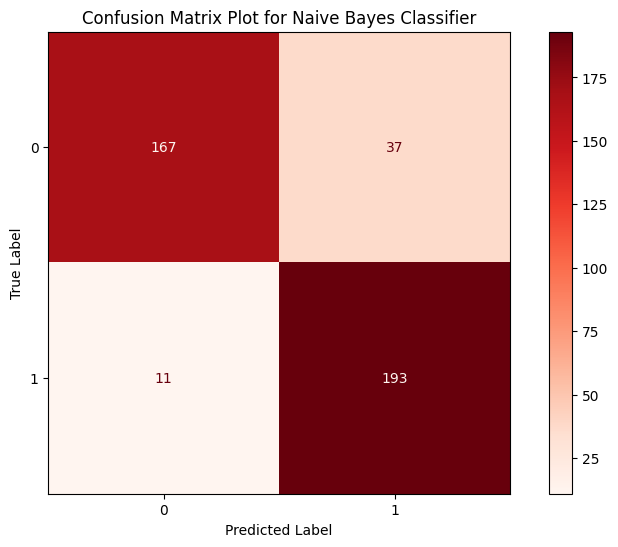

In [26]:
# Compute confusion matrix
cm = confusion_matrix(Ytest, y_pred)


# Create a ConfusionMatrixDisplay object
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])


# Plot the confusion matrix with a color map
matrix.plot(cmap=plt.cm.Reds)


# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for Naive Bayes Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)


# Show the plot
plt.show()


In [27]:
fprNB, tprNB, thresholdNB=metrics.roc_curve(Ytest, y_pred)

In [28]:
from sklearn.linear_model import LogisticRegression
# Fit the Logistic Regression classifier
LRClassification=LogisticRegression()
LRClassification.fit(Xtrain_tf, Ytrain)

LogisticRegression()

In [29]:
# Predict on the test data
y_pred = LRClassification.predict(Xtest_tf)

In [30]:
# Print confusion matrix and classification report
print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

[[161  43]
 [ 10 194]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       204
           1       0.82      0.95      0.88       204

    accuracy                           0.87       408
   macro avg       0.88      0.87      0.87       408
weighted avg       0.88      0.87      0.87       408



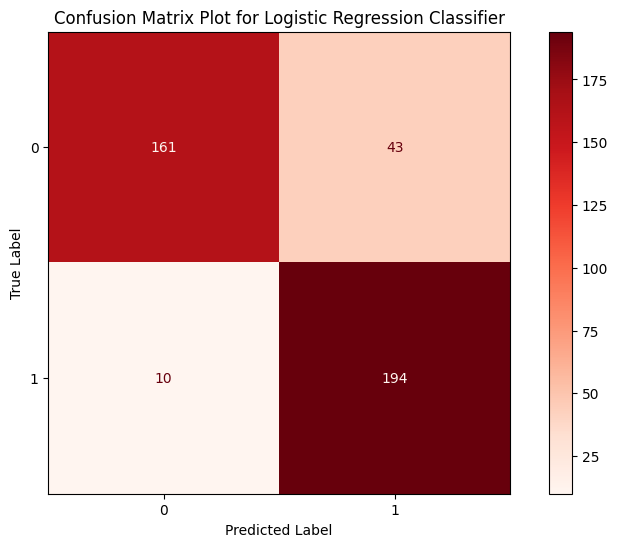

In [31]:
# Compute confusion matrix
cm = confusion_matrix(Ytest, y_pred)

# Create a ConfusionMatrixDisplay object
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])


# Plot the confusion matrix with a color map
matrix.plot(cmap=plt.cm.Reds)


# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for Logistic Regression Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)


# Show the plot
plt.show()

In [32]:
fprLR, tprLR, thresholdsLR = metrics.roc_curve(Ytest,y_pred)

In [33]:
from sklearn.tree import DecisionTreeClassifier
DTClassification=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTClassification.fit(Xtrain_tf, Ytrain)
y_pred=DTClassification.predict(Xtest_tf)

In [34]:
# Print confusion matrix and classification report
print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))
# Compute confusion matrix
cm = confusion_matrix(Ytest, y_pred)


[[175  29]
 [ 34 170]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       204
           1       0.85      0.83      0.84       204

    accuracy                           0.85       408
   macro avg       0.85      0.85      0.85       408
weighted avg       0.85      0.85      0.85       408



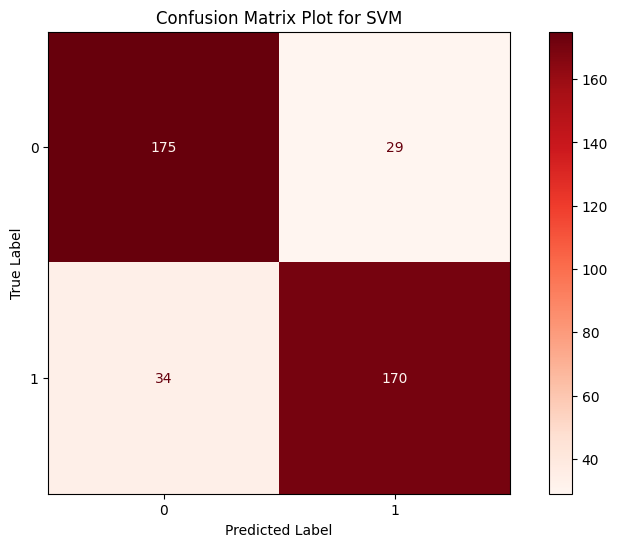

In [35]:
# Create a ConfusionMatrixDisplay object
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix with a color map
matrix.plot(cmap=plt.cm.Reds)

# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for SVM', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)


# Show the plot
plt.show()


In [36]:
fprDT, tprDT, thresholdsDT = metrics.roc_curve(Ytest,y_pred)

[[181  23]
 [ 18 186]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       204
           1       0.89      0.91      0.90       204

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408



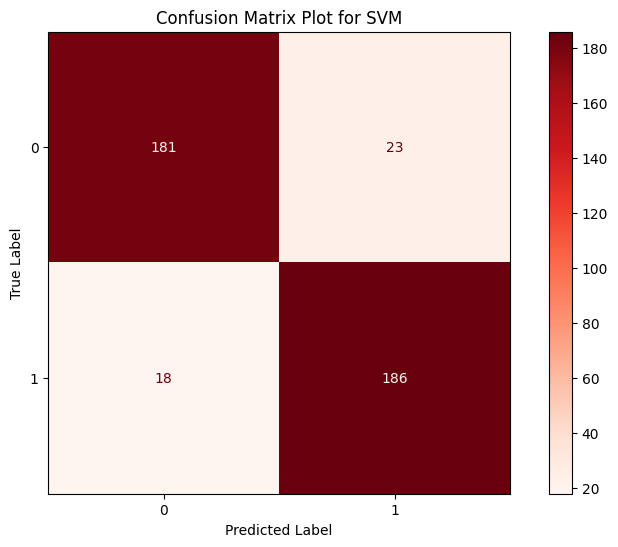

In [37]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(Xtrain_tf, Ytrain)
#Predict the response for test dataset
y_pred = clf.predict(Xtest_tf)


# Print confusion matrix and classification report
print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))
# Compute confusion matrix
cm = confusion_matrix(Ytest, y_pred)


# Create a ConfusionMatrixDisplay object
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])


# Plot the confusion matrix with a color map
matrix.plot(cmap=plt.cm.Reds)


# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for SVM', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)


# Show the plot
plt.show()


In [38]:
fprSVM, tprSVM, thresholdsSVM = metrics.roc_curve(Ytest,y_pred)

[[142  62]
 [ 10 194]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       204
           1       0.76      0.95      0.84       204

    accuracy                           0.82       408
   macro avg       0.85      0.82      0.82       408
weighted avg       0.85      0.82      0.82       408



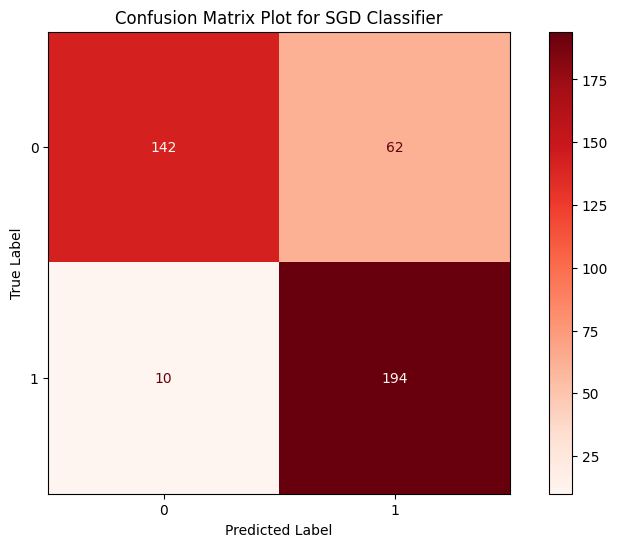

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy' ,random_state=0).fit(Xtrain_tf, Ytrain)
y_pred = rf_classifier.predict(Xtest_tf)

# Print confusion matrix and classification report
print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))
# Compute confusion matrix
cm = confusion_matrix(Ytest, y_pred)


# Create a ConfusionMatrixDisplay object
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])


# Plot the confusion matrix with a color map
matrix.plot(cmap=plt.cm.Reds)


# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for SGD Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)


# Show the plot
plt.show()


In [40]:
fprRm, tprRM, thresholdsRM = metrics.roc_curve(Ytest,y_pred)

## <font color='red'> *SGD* Optimization Method

[[175  29]
 [ 12 192]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       204
           1       0.87      0.94      0.90       204

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408



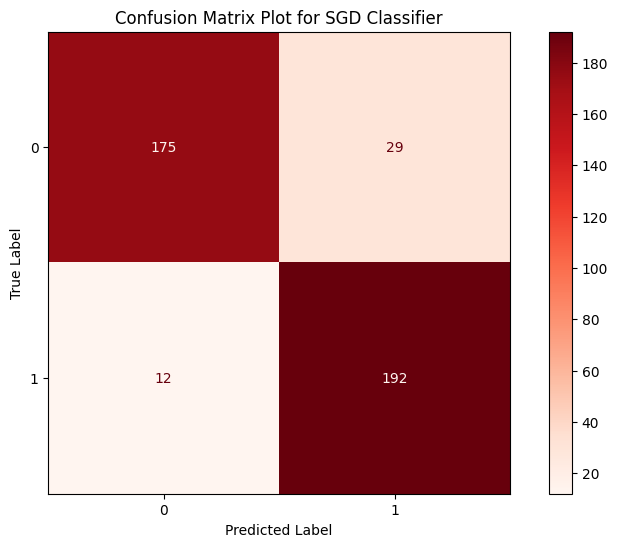

In [41]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss = 'log_loss',penalty='l2', max_iter=10,random_state=0).fit(Xtrain_tf, Ytrain)
y_pred=sgd_classifier.predict(Xtest_tf)

# Print confusion matrix and classification report
print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

# Compute confusion matrix
cm = confusion_matrix(Ytest, y_pred)

# Create a ConfusionMatrixDisplay object
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])


# Plot the confusion matrix with a color map
matrix.plot(cmap=plt.cm.Reds)

# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for SGD Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()


In [42]:
fprSGD, tprSGD, thresholdsSGD = metrics.roc_curve(Ytest,y_pred)

## Randomize

In [43]:
svm_clf = svm.SVC(probability=True,random_state=1)

auc = make_scorer(roc_auc_score)

# Randomize Search for 20 Combitions of Parameters
rand_list = {
    "C":stats.uniform(2,10), # trade of between error and com
    "gamma": stats.uniform(0.1, 1), # low value simple high value complex model
    "kernel": ["rbf"] # if non linearity
}


rand_search = RandomizedSearchCV(svm_clf,param_distributions = rand_list , n_iter= 20 , n_jobs= 4 , cv= 3 , random_state= 2017 , scoring= auc )

rand_search.fit(Xtrain_tf, Ytrain)
rand_search.cv_results_

random_predictions = rand_search.predict(Xtest_tf)

[[179  25]
 [ 14 190]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       204
           1       0.88      0.93      0.91       204

    accuracy                           0.90       408
   macro avg       0.91      0.90      0.90       408
weighted avg       0.91      0.90      0.90       408



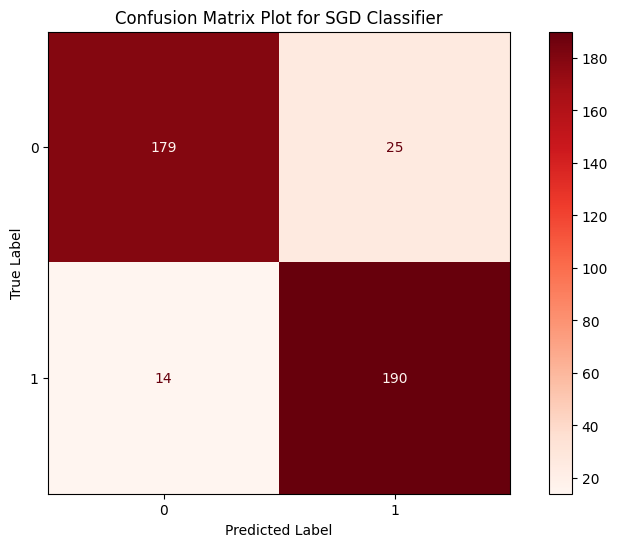

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


# Print confusion matrix and classification report
print(confusion_matrix(Ytest, random_predictions))
print(classification_report(Ytest, random_predictions))


# Plot the confusion matrix with a color map
# matrix = plot_confusion_matrix(rand_search, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix = ConfusionMatrixDisplay.from_estimator(rand_search, Xtest_tf, Ytest, cmap=plt.cm.Reds)


# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for SGD Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')

plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()

In [45]:
fprSVM_optimized, tprSVM_optimized, thresholdsSVM_optimized = metrics.roc_curve(Ytest,y_pred)

<Figure size 640x480 with 0 Axes>

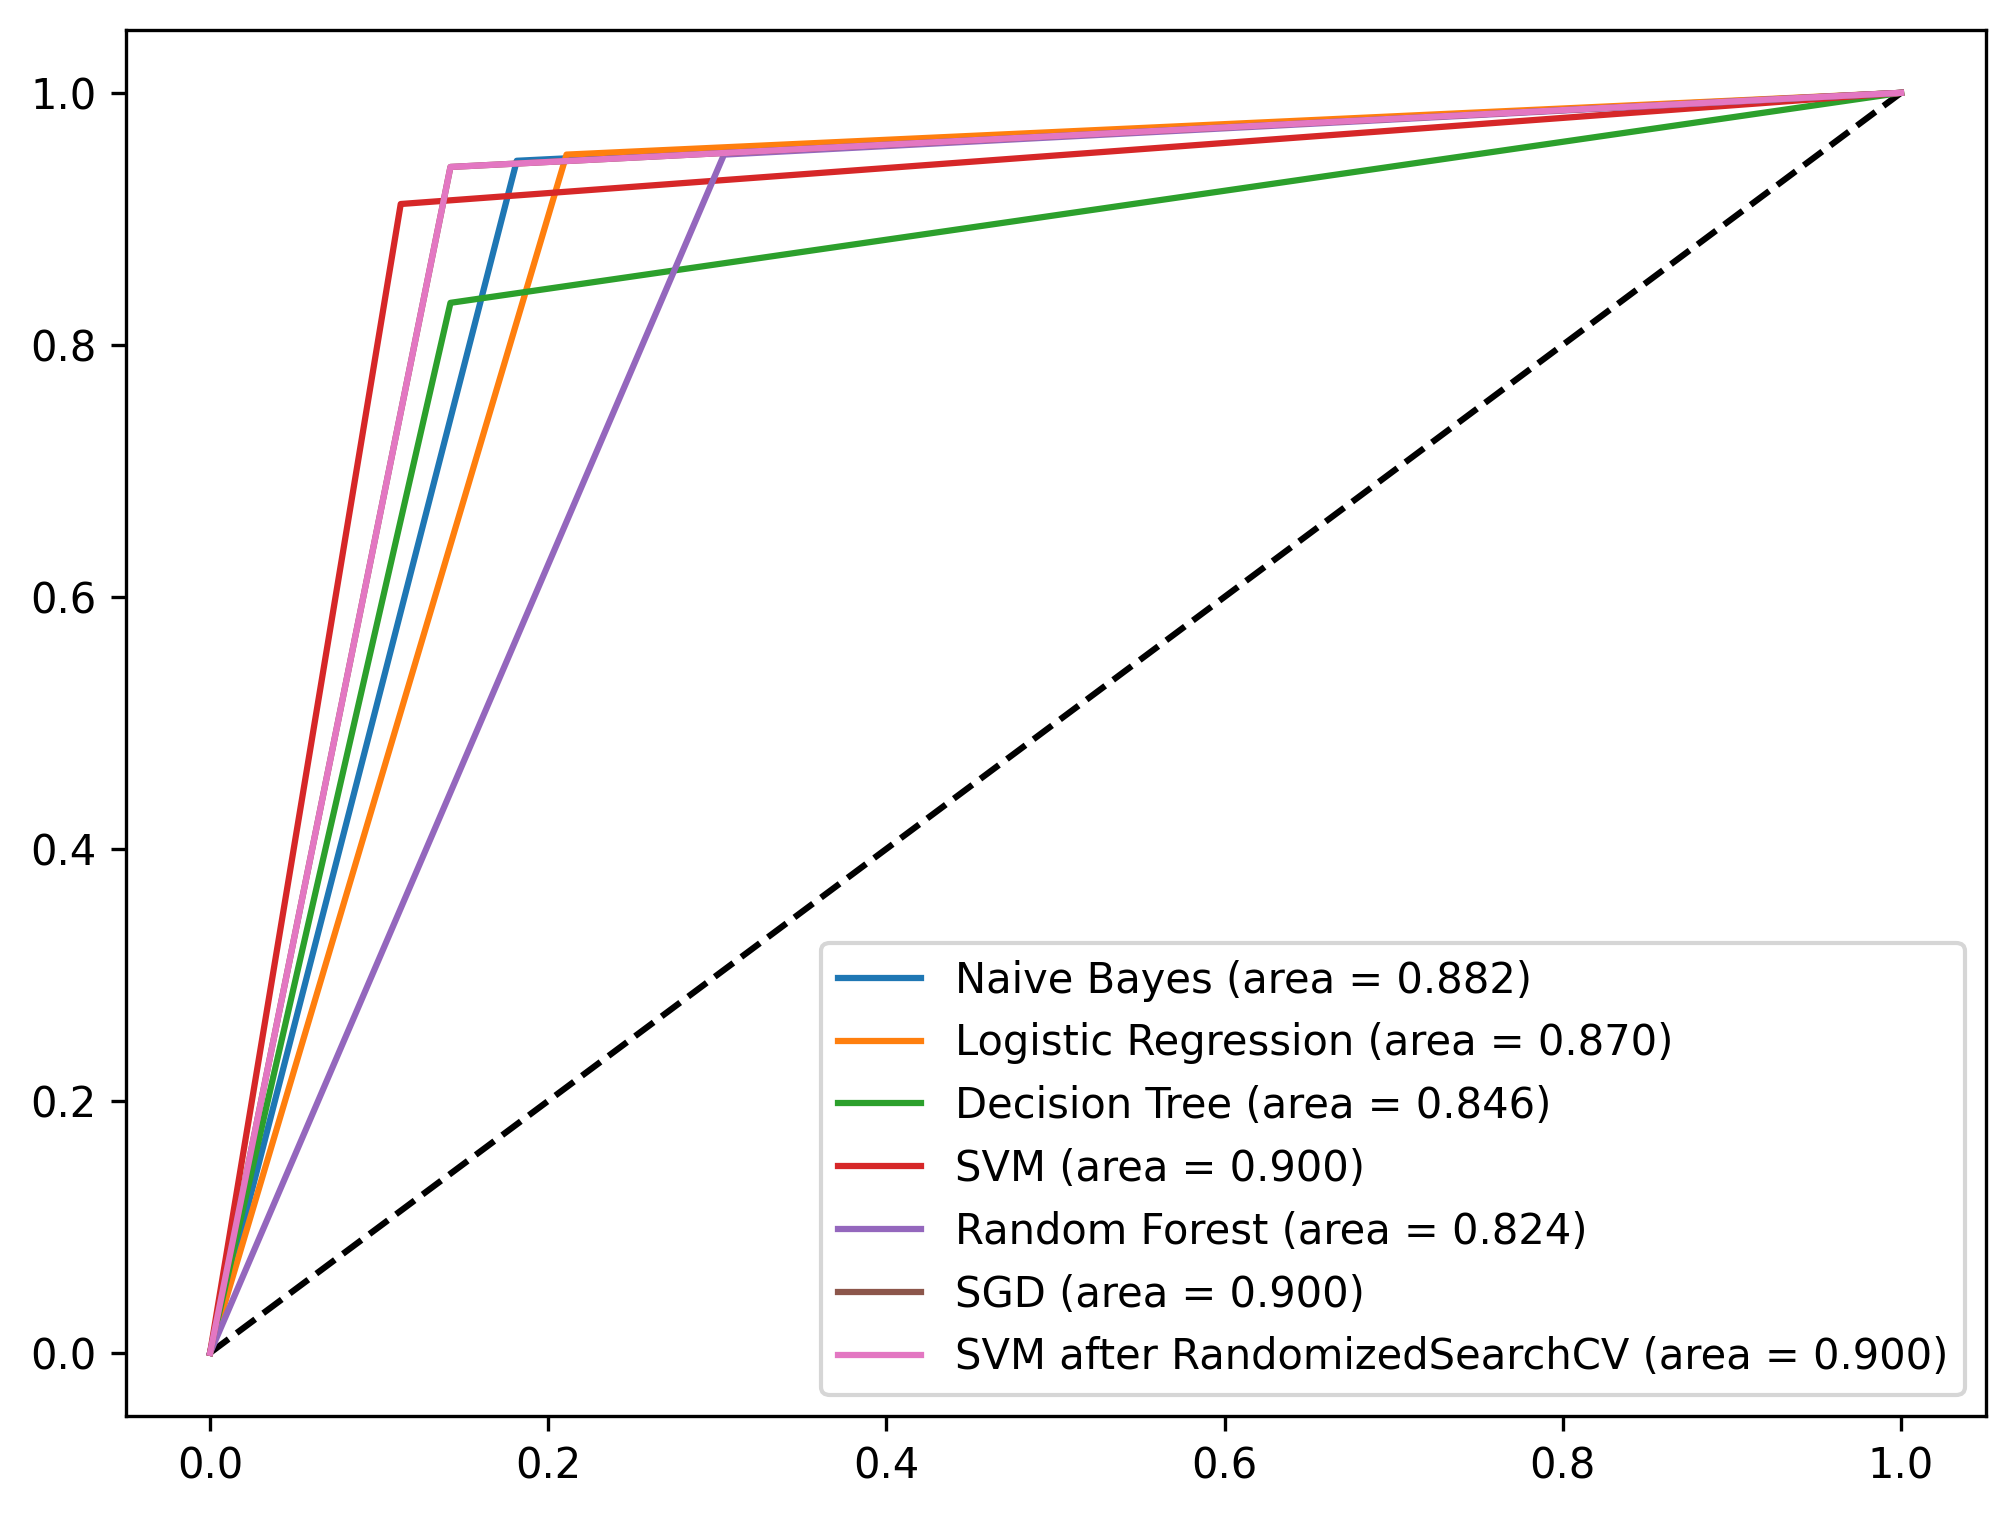

In [46]:
from matplotlib import pyplot as plt
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

plt.figure(1)
plt.figure(figsize=(8, 6), dpi=300)
plt.plot([0, 1], [0, 1], 'k--')

auc_NB = auc(fprNB, tprNB)
auc_LR = auc(fprLR, tprLR)
auc_DT = auc(fprDT , tprDT)
auc_SVM = auc(fprSVM, tprSVM)
auc_RF = auc(fprRm, tprRM)
auc_SGD = auc(fprSGD, tprSGD)
auc_SVM_optimized = auc(fprSVM_optimized, tprSVM_optimized)

plt.plot(fprNB, tprNB, label='Naive Bayes (area = {:.3f})'.format(auc_NB))
plt.plot(fprLR, tprLR, label='Logistic Regression (area = {:.3f})'.format(auc_LR))
plt.plot(fprDT, tprDT, label='Decision Tree (area = {:.3f})'.format(auc_DT))
plt.plot(fprSVM, tprSVM, label='SVM (area = {:.3f})'.format(auc_SVM))
plt.plot(fprRm, tprRM, label='Random Forest (area = {:.3f})'.format(auc_RF))
plt.plot(fprSGD, tprSGD, label='SGD (area = {:.3f})'.format(auc_SGD))
plt.plot(fprSVM_optimized, tprSVM_optimized, label='SVM after RandomizedSearchCV (area = {:.3f})'.format(auc_SVM_optimized))


plt.legend(loc='lower right')
plt.show()

In [47]:
!pip install joblib

In [48]:
import cloudpickle

# Save the SVM Optimized model
with open('/content/drive/MyDrive/nlp-class-live/svm_optimized_model.pkl', 'wb') as f:
    cloudpickle.dump(rand_search, f)

# Save the Tfidf Vectorizer
with open('/content/drive/MyDrive/nlp-class-live/tfidf_vectorizer.pkl', 'wb') as f:
    cloudpickle.dump(tfidf, f)

In [49]:
# Load the SVM Optimized model
with open('/content/drive/MyDrive/nlp-class-live/svm_optimized_model.pkl', 'rb') as f:
    rand_search = cloudpickle.load(f)

# Load the Tfidf Vectorizer
with open('/content/drive/MyDrive/nlp-class-live/tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = cloudpickle.load(f)

In [50]:
def predict_sentiment_svm(input_sentence):
    # Tokenize and transform the input sentence just like you did with the training data
    words = tokenizer.bn_word_tokenizer(input_sentence)
    wordsExcludingPunctuationMarks = [word for word in words if word not in punctuation_marks]
    wordsExcludingStopwords = [word for word in wordsExcludingPunctuationMarks if word not in bangla_stopwords]
    transformed_input = tfidf.transform([' '.join(wordsExcludingStopwords)])

    # Predict using the SVM Optimized model
    prediction = rand_search.predict(transformed_input)

    # Print the predicted sentiment
    print(f"Predicted Sentiment: {'Positive' if prediction[0] == 1 else 'Negative'}")

In [51]:
# Test the function with an input sentence
input_sentence = "এই পণ্যটি কাজ করছে না।"
predict_sentiment_svm(input_sentence)

Predicted Sentiment: Negative


In [52]:
# Test the function with an input sentence
input_sentence = "এই পণ্যটি কাজ করছে ।"
predict_sentiment_svm(input_sentence)

Predicted Sentiment: Positive


# Grid Search CV for SVM

In [53]:
svm_clf = svm.SVC(probability=True, random_state=1)

auc = make_scorer(roc_auc_score)

# Define the parameter grid for GridSearchCV
# Note: 'rand_list' is renamed to 'param_grid'
param_grid = {
    "C": (2,10),  # List of values for C
    "gamma": (0.1,1),  # List of values for gamma
    "kernel": ["rbf"]  # Fixed kernel
}

# Use GridSearchCV with the defined parameter grid
grid_search = GridSearchCV(svm_clf, param_grid=param_grid,n_jobs=4, cv=3, scoring=auc)

grid_search.fit(Xtrain_tf, Ytrain)

# Get predictions from the best model found by GridSearchCV
grid_predictions = grid_search.predict(Xtest_tf)

In [54]:
grid_search.cv_results_

{'mean_fit_time': array([2.15462224, 2.08304485, 1.90437675, 1.66551145]),
 'std_fit_time': array([0.06396151, 0.01691791, 0.21174553, 0.05013044]),
 'mean_score_time': array([0.2916201 , 0.2016925 , 0.17865356, 0.15203309]),
 'std_score_time': array([0.00258257, 0.07015367, 0.03398874, 0.01138684]),
 'param_C': masked_array(data=[2, 2, 10, 10],
              mask=[False, False, False, False],
        fill_value=999999),
 'param_gamma': masked_array(data=[0.1, 1.0, 0.1, 1.0],
              mask=[False, False, False, False],
        fill_value=1e+20),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf'],
              mask=[False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'C': 2, 'gamma': 0.1, 'kernel': 'rbf'},
  {'C': 2, 'gamma': 1, 'kernel': 'rbf'},
  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}],
 'split0_test_score': array([0.7138146 , 0.8417772 , 0.87160252, 0.8417772 ]),
 'split1

[[182  22]
 [ 19 185]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       204
           1       0.89      0.91      0.90       204

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408



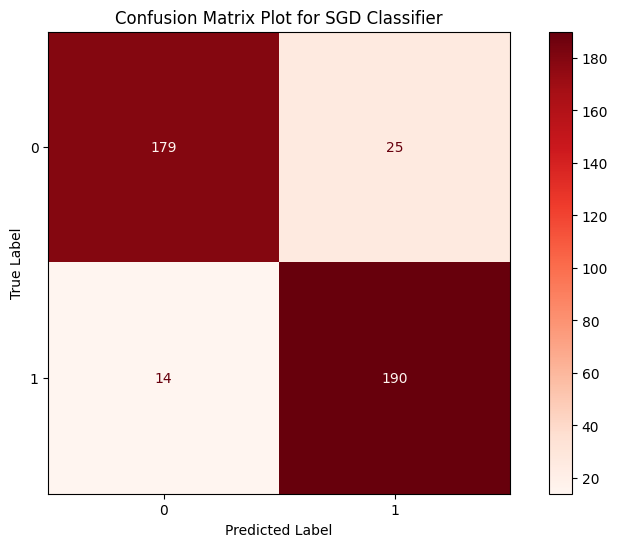

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


# Print confusion matrix and classification report
print(confusion_matrix(Ytest, grid_predictions))
print(classification_report(Ytest, grid_predictions))


# Plot the confusion matrix with a color map
# matrix = plot_confusion_matrix(rand_search, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix = ConfusionMatrixDisplay.from_estimator(rand_search, Xtest_tf, Ytest, cmap=plt.cm.Reds)


# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for SGD Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')

plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()

In [64]:
# Save the (SVM) Gride Seach model
with open('/content/drive/MyDrive/nlp-class-live/grid_search_svM.pkl', 'wb') as f:
    cloudpickle.dump(grid_search, f)

# GridSearch for SGD CLassifier

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=0)

param_grid = {
    'loss': ['hinge', 'log_loss','modified_huber'],
    'penalty': ['l2', 'l1','elasticnet'],
    'alpha': [1e-4, 1e-3, 1e-2,1e-1],
    'max_iter': [10, 50, 100, 1000],
    'learning_rate': ['optimal', 'adaptive'],
    'eta0': [0.01, 0.1, 1.0],
}

grid = GridSearchCV(sgd, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(Xtrain_tf, Ytrain)

y_pred = grid.predict(Xtest_tf)
print("Best parameters:", grid.best_params_)



Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best parameters: {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 50, 'penalty': 'l2'}


In [57]:
print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       204
           1       0.91      0.90      0.90       204

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408



[[185  19]
 [ 20 184]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       204
           1       0.91      0.90      0.90       204

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408



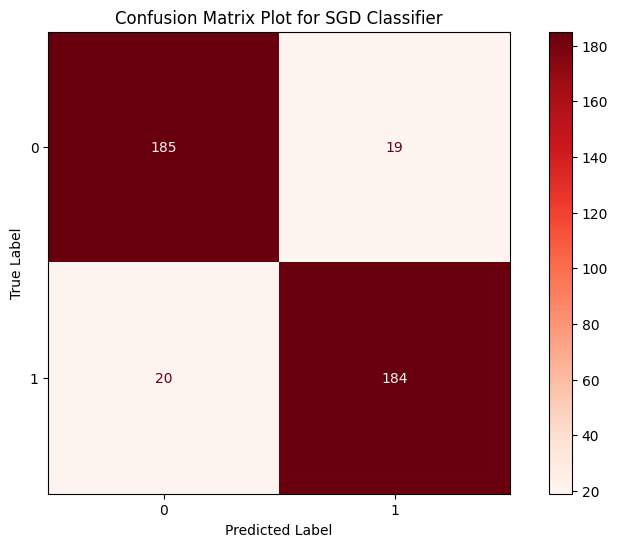

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


# Print confusion matrix and classification report
print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))


# Plot the confusion matrix with a color map
# matrix = plot_confusion_matrix(rand_search, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix = ConfusionMatrixDisplay.from_estimator(grid, Xtest_tf, Ytest, cmap=plt.cm.Reds)


# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for SGD Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')

plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()

In [63]:
# Save the SVM Optimized model
with open('/content/drive/MyDrive/nlp-class-live/grid_search_SGDClassifer.pkl', 'wb') as f:
    cloudpickle.dump(grid, f)